<a href="https://colab.research.google.com/github/ShivaniMareddy/DBScan/blob/main/DBSCAN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path = '/content/drive/MyDrive/NewYorkCityTaxiTripDuration.csv'
dataset = pd.read_csv(path)
dataset.head()

Mounted at /content/drive


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# take small sample to avoid memory crash
dataset_small = dataset.sample(n=5000, random_state=42)


In [ ]:
X = dataset_small[['pickup_latitude','pickup_longitude']]
X.head()


,pickup_latitude,pickup_longitude
67250,40.735943,-73.985611
1397036,40.764351,-73.978394
1021087,40.744389,-73.989059
951424,40.731136,-73.990326
707882,40.646675,-73.789497


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import DBSCAN

db1 = DBSCAN(eps=0.2, min_samples=5)
labels_1 = db1.fit_predict(X_scaled)




In [ ]:
db2 = DBSCAN(eps=0.3, min_samples=5)
labels_2 = db2.fit_predict(X_scaled)


In [ ]:

db3 = DBSCAN(eps=0.5, min_samples=5)
labels_3 = db3.fit_predict(X_scaled)

In [ ]:
import numpy as np

def evaluate(labels, name):
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)

    print("\n",name)
    print("Clusters:", n_clusters)
    print("Noise points:", n_noise)
    print("Noise ratio:", round(noise_ratio,3))

evaluate(labels_1,"Experiment 1 (eps=0.2)")
evaluate(labels_2,"Experiment 2 (eps=0.3)")
evaluate(labels_3,"Experiment 3 (eps=0.5)")



 Experiment 1 (eps=0.2)
Clusters: 9
Noise points: 72
Noise ratio: 0.014

 Experiment 2 (eps=0.3)
Clusters: 5
Noise points: 48
Noise ratio: 0.01

 Experiment 3 (eps=0.5)
Clusters: 2
Noise points: 21
Noise ratio: 0.004


In [ ]:
from sklearn.metrics import silhouette_score

def get_score(labels,name):
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        score = silhouette_score(X_scaled[mask], labels[mask])
        print(name,"Silhouette:",round(score,3))
        return score
    else:
        print(name,"Silhouette: Not Applicable")
        return -1

s1 = get_score(labels_1,"Exp1")
s2 = get_score(labels_2,"Exp2")
s3 = get_score(labels_3,"Exp3")


Exp1 Silhouette: 0.088
Exp2 Silhouette: 0.25
Exp3 Silhouette: 0.808


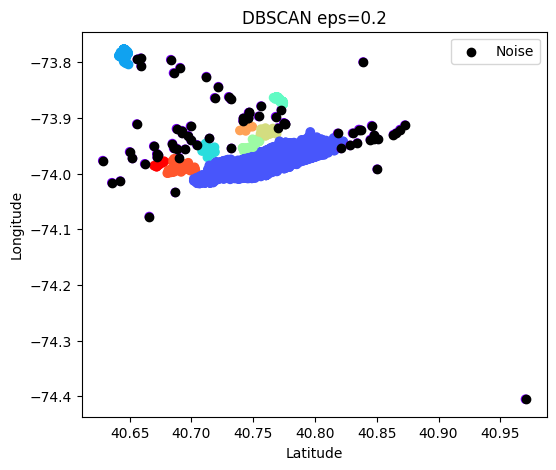

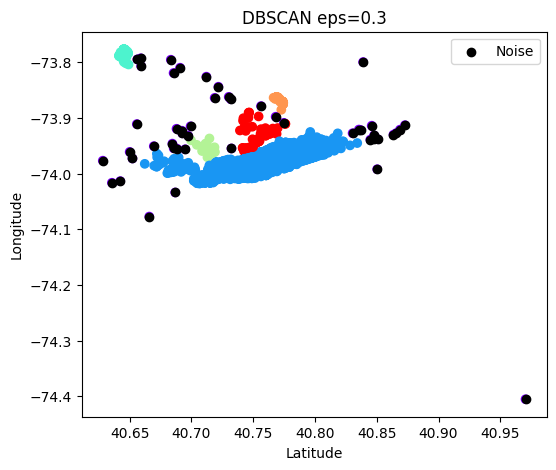

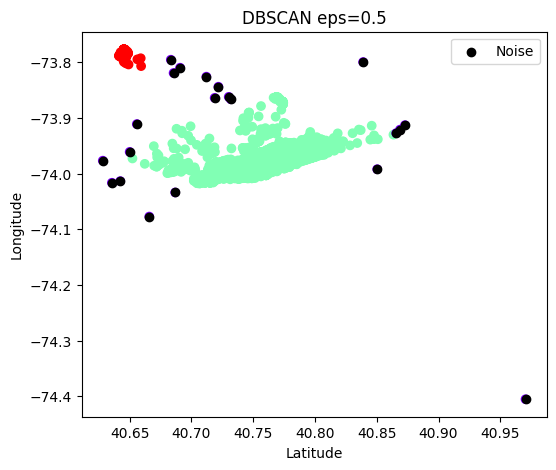

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(labels,title):
    plt.figure(figsize=(6,5))
    plt.scatter(X['pickup_latitude'], X['pickup_longitude'], c=labels, cmap='rainbow')

    # noise points
    plt.scatter(X.iloc[labels==-1]['pickup_latitude'],
                X.iloc[labels==-1]['pickup_longitude'],
                color='black', label='Noise')

    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.legend()
    plt.show()

plot_clusters(labels_1,"DBSCAN eps=0.2")
plot_clusters(labels_2,"DBSCAN eps=0.3")
plot_clusters(labels_3,"DBSCAN eps=0.5")


In [ ]:
scores = [s1,s2,s3]
eps_values = [0.2,0.3,0.5]

best_eps = eps_values[np.argmax(scores)]
print("\nBest eps value =", best_eps)



Best eps value = 0.5
